## XGBoost 실습

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

## Data

In [2]:
## 유방암 데이터셋 로드
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

In [5]:
## feature sample 확인
features[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [6]:
## class sample 확인
labels[:3]

array([0, 0, 0])

In [7]:
## 데이터를 Pandas DataFrame으로 로드
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
## 클래스 별 데이터 수 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


- 학습 및 검증 데이터셋으로 데이터 분리



In [9]:
## 학습 및 검증 데이터셋으로 데이터 분리
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

In [11]:
X_features.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y_label.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [32]:
## 학습, 검증용 데이터셋 비율 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

## X_train, y_train을 다시 9 : 1 비율로 분리
## => XGBoost가 제공하는 교차 검증 성능 평가 및 조기 중단을 수행하기 위함
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [33]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [34]:
X_tr.shape, X_val.shape

((409, 30), (46, 30))

## Model

- 모델 로드 후 학습 및 검증 과정 수행

In [43]:
## 모델 성능 평가 함수 선언
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [53]:
from xgboost import XGBClassifier

## 모델 선언
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=3, eval_metric='logloss')

## 학습용 데이터, 검증용 데이터
evals = [(X_tr, y_tr), (X_val, y_val)]

## early stopping 적용
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

w_preds = xgb_clf.predict(X_test)
w_preds_proba = xgb_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.650162	validation_1-logloss:0.661831
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.611314	validation_1-logloss:0.636086
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.611436
[3]	validation_0-logloss:0.543099	validation_1-logloss:0.592036
[4]	validation_0-logloss:0.513234	validation_1-logloss:0.573291
[5]	validation_0-logloss:0.484475	validation_1-logloss:0.550371
[6]	validation_0-logloss:0.457959	validation_1-logloss:0.529295
[7]	validation_0-logloss:0.434357	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.411503	validation_1-logloss:0.497179
[9]	validation_0-logloss:0.390274	validation_1-logloss:0.481542
[10]	validation_0-logloss:0.371284	validation_1-logloss:0.469904
[11]	validation_0-logloss:0.352541	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.335278	validation_1-logloss:0.442294
[13

In [54]:
get_clf_eval(y_test, w_preds, w_preds_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9933


In [55]:
from xgboost import XGBClassifier

## 모델 선언
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=3, eval_metric='logloss')

## 학습용 데이터, 검증용 데이터
evals = [(X_tr, y_tr), (X_val, y_val)]

## early stopping 적용 => early stopping rounds 10으로 줄임 => 값이 너무 작으면 오히려 성능이 낮아질 수 있음을 확인
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=5, eval_metric='logloss', eval_set=evals, verbose=True)

w_preds = xgb_clf.predict(X_test)
w_preds_proba = xgb_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.650162	validation_1-logloss:0.661831
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.611314	validation_1-logloss:0.636086
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.611436
[3]	validation_0-logloss:0.543099	validation_1-logloss:0.592036
[4]	validation_0-logloss:0.513234	validation_1-logloss:0.573291
[5]	validation_0-logloss:0.484475	validation_1-logloss:0.550371
[6]	validation_0-logloss:0.457959	validation_1-logloss:0.529295
[7]	validation_0-logloss:0.434357	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.411503	validation_1-logloss:0.497179
[9]	validation_0-logloss:0.390274	validation_1-logloss:0.481542
[10]	validation_0-logloss:0.371284	validation_1-logloss:0.469904
[11]	validation_0-logloss:0.352541	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.335278	validation_1-logloss:0.442294
[13]

In [56]:
get_clf_eval(y_test, w_preds, w_preds_proba)

오차 행렬
[[34  3]
 [ 3 74]]
정확도: 0.9474, 정밀도: 0.9610, 재현율: 0.9610, F1: 0.9610, AUC: 0.9933


## feature importances

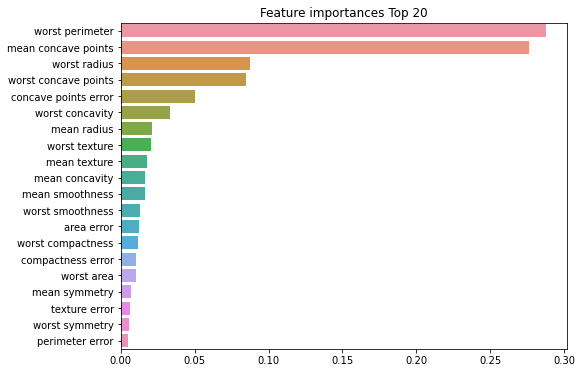

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [58]:
ftr_importances_values

array([2.11928859e-02, 1.76238548e-02, 0.00000000e+00, 0.00000000e+00,
       1.61734167e-02, 0.00000000e+00, 1.64542813e-02, 2.76151568e-01,
       6.98020775e-03, 0.00000000e+00, 4.85891243e-03, 6.31278474e-03,
       5.13640977e-03, 1.20405955e-02, 0.00000000e+00, 1.05418283e-02,
       6.87997672e-05, 5.02820089e-02, 2.59894575e-03, 0.00000000e+00,
       8.72398689e-02, 2.02455875e-02, 2.87825465e-01, 1.00380108e-02,
       1.26686739e-02, 1.14352582e-02, 3.33889462e-02, 8.50223973e-02,
       5.71935391e-03, 0.00000000e+00], dtype=float32)

In [59]:
ftr_importances

mean radius                0.021193
mean texture               0.017624
mean perimeter             0.000000
mean area                  0.000000
mean smoothness            0.016173
mean compactness           0.000000
mean concavity             0.016454
mean concave points        0.276152
mean symmetry              0.006980
mean fractal dimension     0.000000
radius error               0.004859
texture error              0.006313
perimeter error            0.005136
area error                 0.012041
smoothness error           0.000000
compactness error          0.010542
concavity error            0.000069
concave points error       0.050282
symmetry error             0.002599
fractal dimension error    0.000000
worst radius               0.087240
worst texture              0.020246
worst perimeter            0.287825
worst area                 0.010038
worst smoothness           0.012669
worst compactness          0.011435
worst concavity            0.033389
worst concave points       0

In [60]:
ftr_top20

worst perimeter         0.287825
mean concave points     0.276152
worst radius            0.087240
worst concave points    0.085022
concave points error    0.050282
worst concavity         0.033389
mean radius             0.021193
worst texture           0.020246
mean texture            0.017624
mean concavity          0.016454
mean smoothness         0.016173
worst smoothness        0.012669
area error              0.012041
worst compactness       0.011435
compactness error       0.010542
worst area              0.010038
mean symmetry           0.006980
texture error           0.006313
worst symmetry          0.005719
perimeter error         0.005136
dtype: float32